In [ ]:
#Datos categoricos
import pandas as pd

Comúnmente los conjuntos de datos contienen datos categóricos. Es importante distinguir
entre datos categóricos ordinales y nominales; los ordinales son aquellos que pueden ser orde-
nados (p.e., en la talla de una prenda M < G < XG); en los nominales no tiene mucho sentido
pensar en un orden (p.e., en el color de una prenda)

In [ ]:
#ordinales
df=pd.DataFrame([
    ['verde','M',10.3,'clase1'],
    ['rojo','G',14.2,'clase2'],
    ['azul','XL',15.6,'clase3']
])
df.columns=['color','talla','precio','clase']
df

,color,talla,precio,clase
0,verde,M,10.3,clase1
1,rojo,G,14.2,clase2
2,azul,XL,15.6,clase3


In [ ]:
import numpy as np
clase_map ={et:id for id, et in enumerate(np.unique(df.clase))}
clase_map

{'clase1': 0, 'clase2': 1, 'clase3': 2}

In [ ]:
df.clase = df.clase.map(clase_map)
df

,color,talla,precio,clase
0,verde,M,10.3,0
1,rojo,G,14.2,1
2,azul,XL,15.6,2


In [ ]:
#color_map ={et:id for id, et in enumerate(np.unique(df.color))}
#color_map# No sirve porque no hay ordenamiento para los colores
#Onehot

{'azul': 0, 'rojo': 1, 'verde': 2}

Mapeando valores ordinales
Para garantizar que nuestros algoritmos interpretan correctamente características ordinales,
es necesario convertir estas características en valores enteros; desafortunadamente no hay una
función que pueda determinar automáticamente el orden correcto a partir de las etiquetas de
la talla; por lo tanto, en general se debe realizar este proceso manualmente (con ayuda de un
diccionario):

In [ ]:
#talla_map ={et:id for id, et in enumerate(np.unique(df.talla))}
#talla_map #No sirve por el orden de las tallas

talla_map = {'M':0,'G':1,'XG':2}
talla_map

{'M': 0, 'G': 1, 'XG': 2}

In [ ]:
df['talla']=df['talla'].map(talla_map)
df

,color,talla,precio,clase
0,verde,0.0,10.3,0
1,rojo,1.0,14.2,1
2,azul,NaN,15.6,2


In [ ]:
df.color.shape

(3,)

In [ ]:
#Datos no ordinales
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(df[['color']])
ohe.transform(df[['color']]).toarray

<bound method _cs_matrix.toarray of <3x3 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>>

In [ ]:
pd.get_dummies(df.color)

,azul,rojo,verde
0,False,False,True
1,False,True,False
2,True,False,False


In [ ]:
pd.get_dummies(df.color).drop('azul',axis=1)

,rojo,verde
0,False,True
1,True,False
2,False,False


In [ ]:
#Escalamiento
x = np.array ([0,1,2,3,4,5,6])
print(f'Normalizado: {(x-x.min())/(x.max()-x.min())}')
print(f'Estandarizado: {(x-x.mean())/x.std()}')
print(f'Normalizer: {x/np.linalg.norm(x)}')

Normalizado: [0.         0.16666667 0.33333333 0.5        0.66666667 0.83333333
 1.        ]
Estandarizado: [-1.5 -1.  -0.5  0.   0.5  1.   1.5]
Normalizer: [0.         0.10482848 0.20965697 0.31448545 0.41931393 0.52414242
 0.6289709 ]


In [ ]:
#Deteccion de anomalias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#Conjunto de datos ficticio con distribucion normal
data = np.random.randn(5000)*20+20

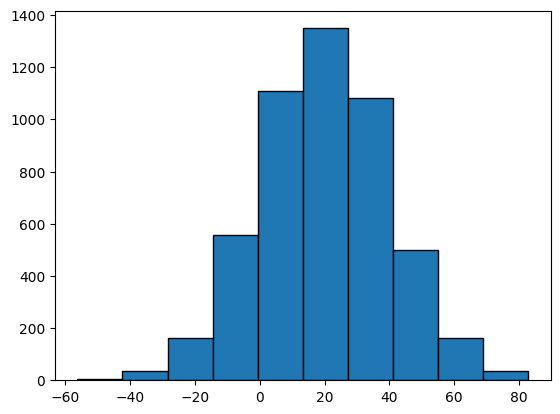

In [ ]:
#Histograma
plt.hist(data,edgecolor='black')
plt.show()

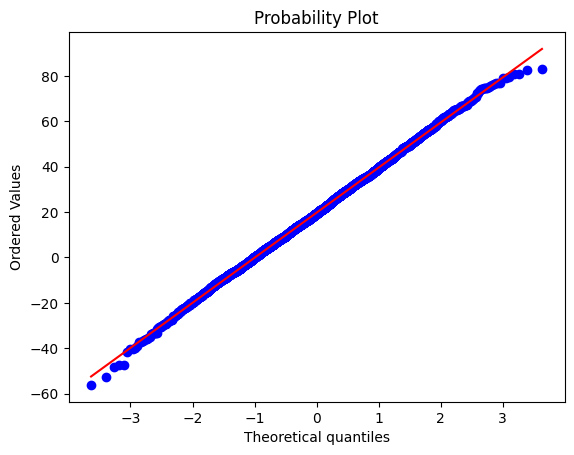

In [ ]:
#2. Quantiles
import pylab
import scipy.stats as st
st.probplot(data,dist='norm',plot=pylab)
pylab.show()


In [ ]:
# Prueba de Shapiro
from scipy.stats import shapiro
_,p_value = shapiro(data)
print (f'p_value : {p_value}')
#p_value >0.05 => distribucion normal

p_value : 0.42153949442291677
